In [1]:
import numpy as np
from scipy.special import erf
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches

%matplotlib inline

Using matplotlibrc file from 
https://github.com/mpmdean/matplotlibrc
All fields are using latex by default -- this avoid non-uniformity when using latex in some labels. 

In [2]:
import sys
print("Python version is {} \n".format(sys.version))
print("Matplotlib version is {} \n".format(mpl.__version__))
print("Matplotlibrc file is {}\n".format(mpl.matplotlib_fname()))

Python version is 3.9.2 | packaged by conda-forge | (default, Feb 21 2021, 05:02:46) 
[GCC 9.3.0] 

Matplotlib version is 3.4.2 

Matplotlibrc file is matplotlibrc



In [3]:
colors = [f'C{i}' for i in range(10)]

## Make fake data

In [4]:
Tcen = 250
width = .001
c = 0.2
a = 0.7
width = 20

x = np.linspace(0, 350, 20)
y = a*(erf((-x+Tcen)/width)+1)/2 + c

xi = y + (np.random.rand(x.size) - 0.5) * 0.4
xi_err = 0.02+0.01*np.random.rand(x.size)

xfit = np.linspace(x.min(), x.max(), 5000)
yfit = a*(erf((-xfit+Tcen)/width)+1)/2 + c

M = np.min(np.diff(yfit)/np.diff(xfit))
C = c+a/2-M*Tcen


## Create figure

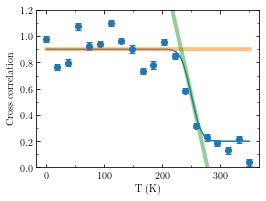

In [5]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.errorbar(x, xi, xi_err, fmt='o', color=colors[0])
ax.plot(xfit, yfit, '-', color=colors[0])

ax.plot(xfit, np.full(xfit.shape, c+a), alpha=0.5, lw=4, color=colors[1])
ax.plot(xfit, M*xfit+C, alpha=0.5, lw=4, color=colors[2])

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.set_xlabel('T (K)')
ax.set_ylabel('Cross correlation')


ax.set_ylim([0, 1.2])

fig.subplots_adjust(bottom=0.15)
fig.savefig('ex_08_error_function_fit.pdf', dpi=600)
